In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import scikitplot as skplt

In [2]:
#Load the dataset
bank=pd.read_csv(r"C:\Users\Animesh Kumar\Downloads\Datasets\BankChurners.csv")
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
bank.shape

(10127, 23)

In [4]:
#Dropping the last two columns as requested by the owner of the dataset
bank.drop(bank.columns[[-2, -1]], axis = 1, inplace = True)
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
bank.shape

(10127, 21)

In [6]:
bank.ndim

2

In [7]:
bank.size

212667

In [8]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
bank.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
#Check null values
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
#check duplicated values
bank.duplicated().sum()

0

In [13]:
round(bank.describe(exclude = 'object'), 2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


In [14]:
round(bank.describe(exclude = ['float', 'int64']), 2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [15]:
#Dropping the "CLIENTNUM" column
bank.drop('CLIENTNUM',axis=1,inplace=True)

#Replacing the values in "Attrition_Flag" with numerical values
bank["Attrition_Flag"].replace(to_replace = ["Existing Customer","Attrited Customer"],value=[0,1],inplace=True)
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Analysing the Categorical Features


## First we will look at the distributions of each categorical variable.

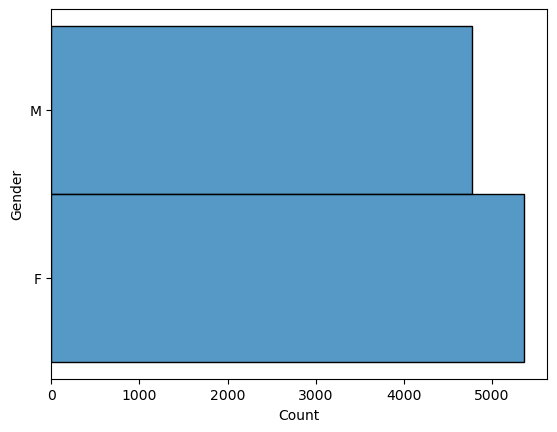

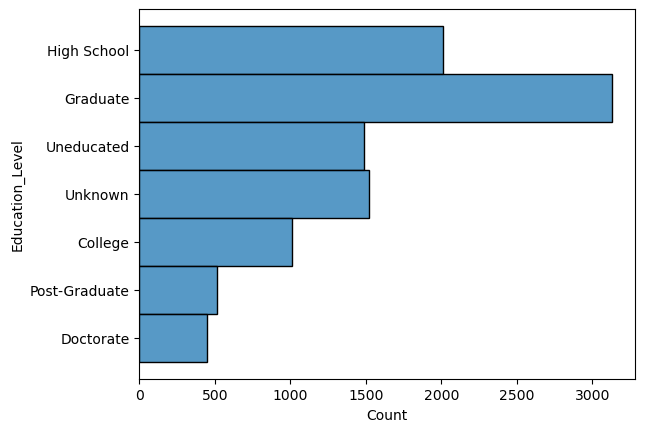

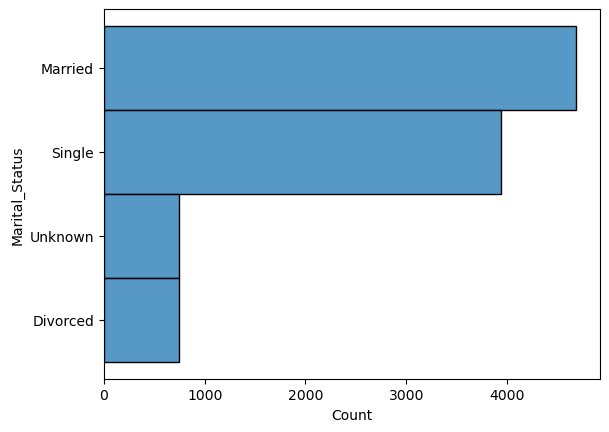

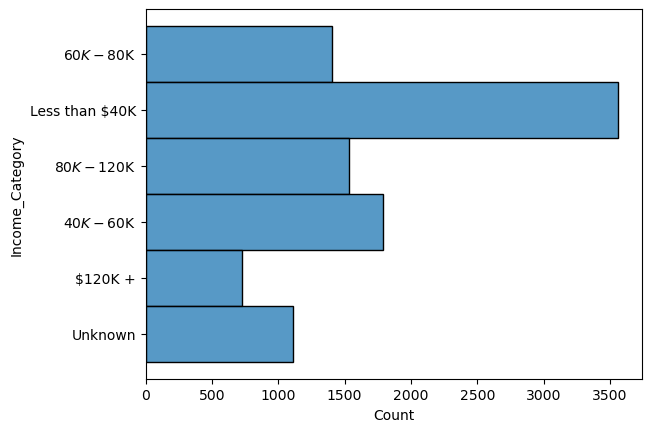

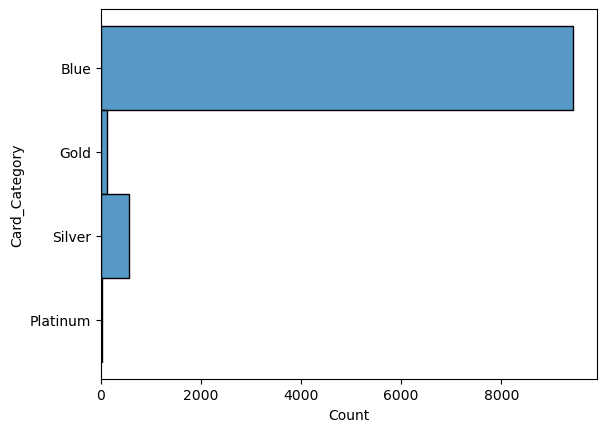

In [16]:
cat_feature=[feature for feature in bank.columns
    if bank[feature].dtype==object]
for feature in cat_feature:
    sns.histplot(y=bank[feature])
    plt.show()

## Now we shall visualize the percentage of churned customer in each category

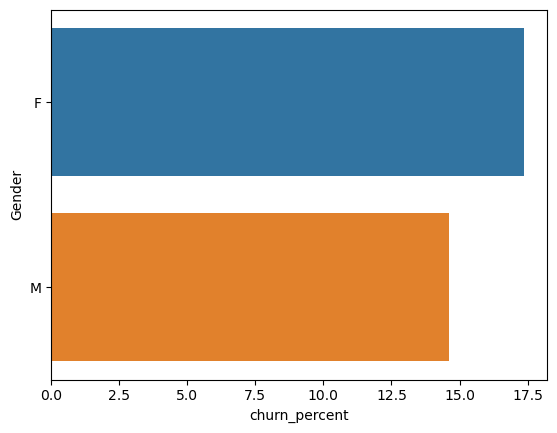

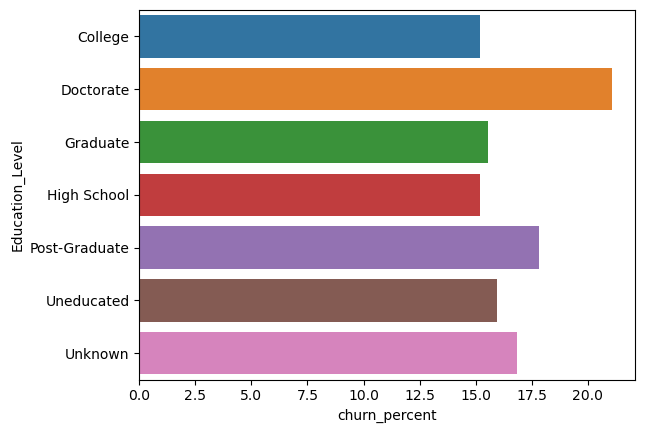

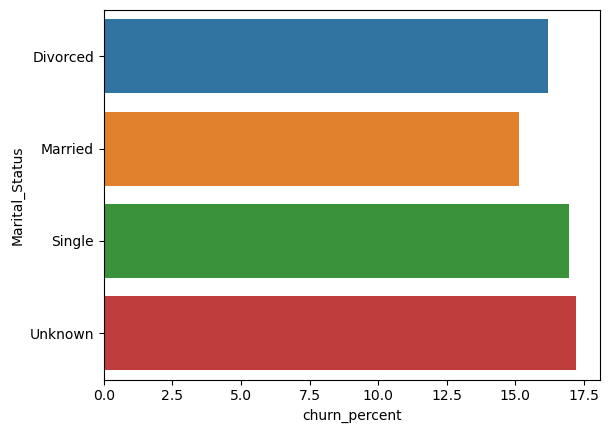

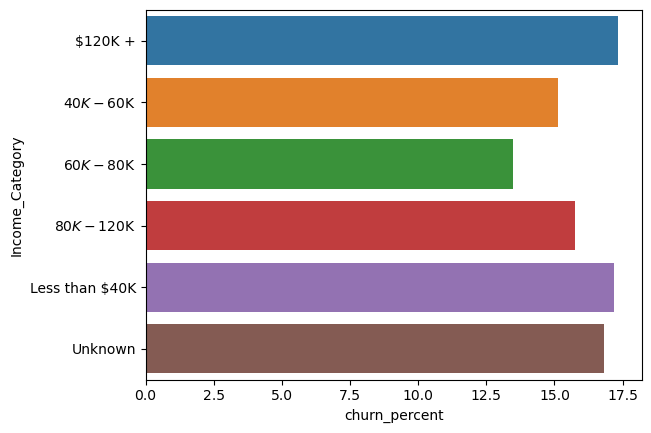

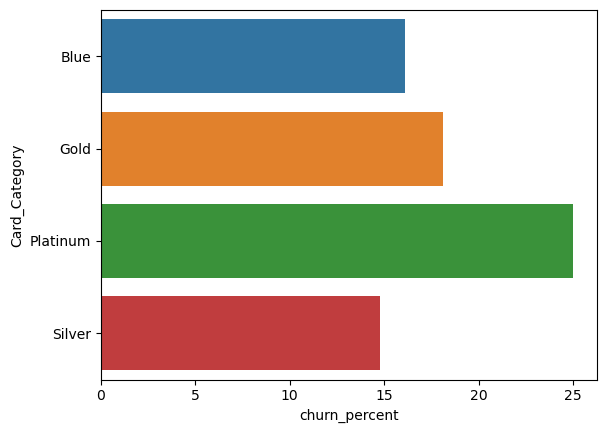

In [17]:
for feature in cat_feature:
    compare = pd.crosstab(bank[feature],bank['Attrition_Flag'], margins = True, margins_name = "Total")
    churn_percent = ((compare[1]/compare['Total'])*100).to_frame('churn_percent').reset_index()[:-1]
    sns.barplot(y=feature, x='churn_percent', data=churn_percent)
    plt.show()

# Analysis of Numerical Features
We shall see the distributions of the number of existing and attrited customers

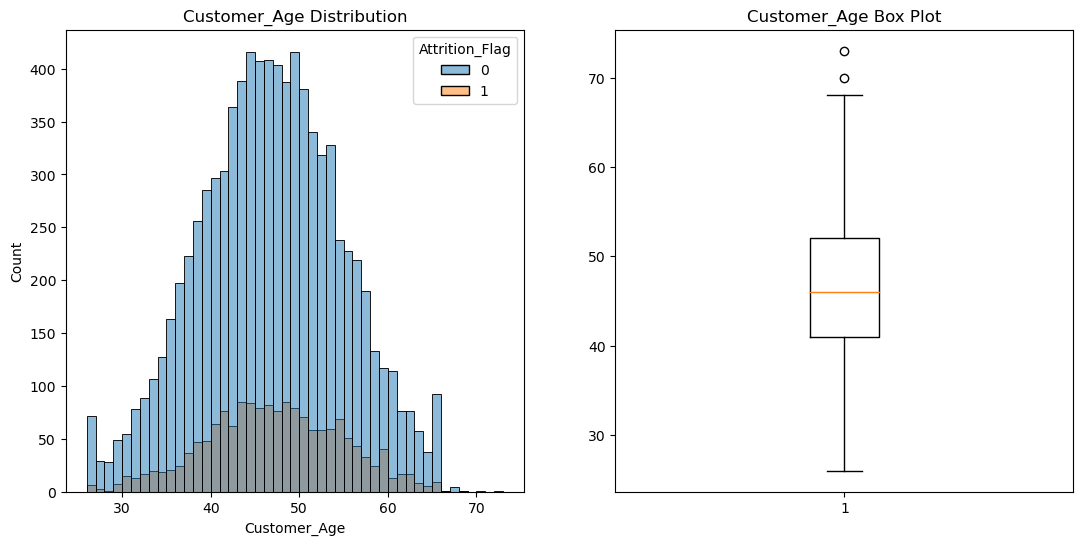

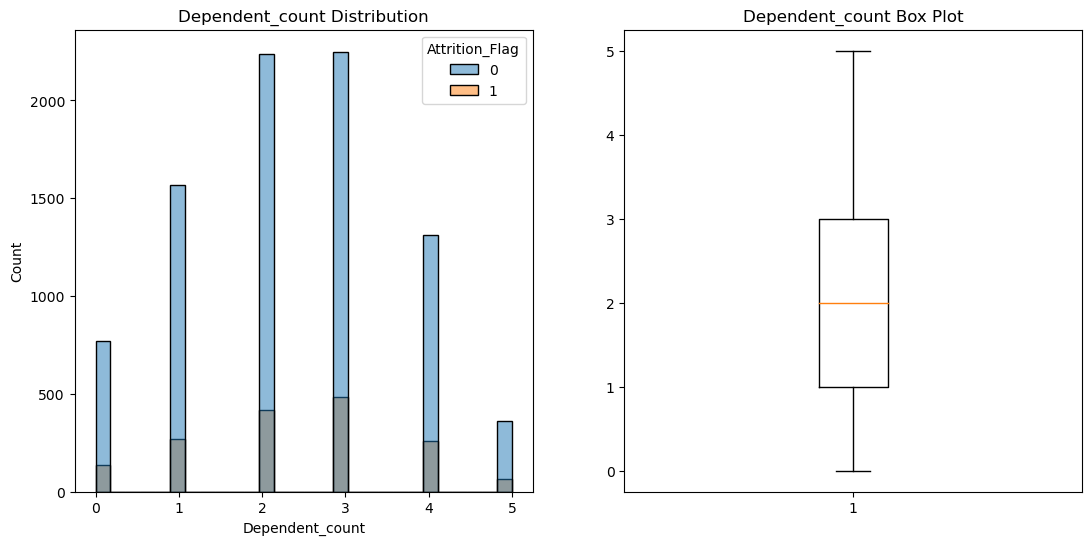

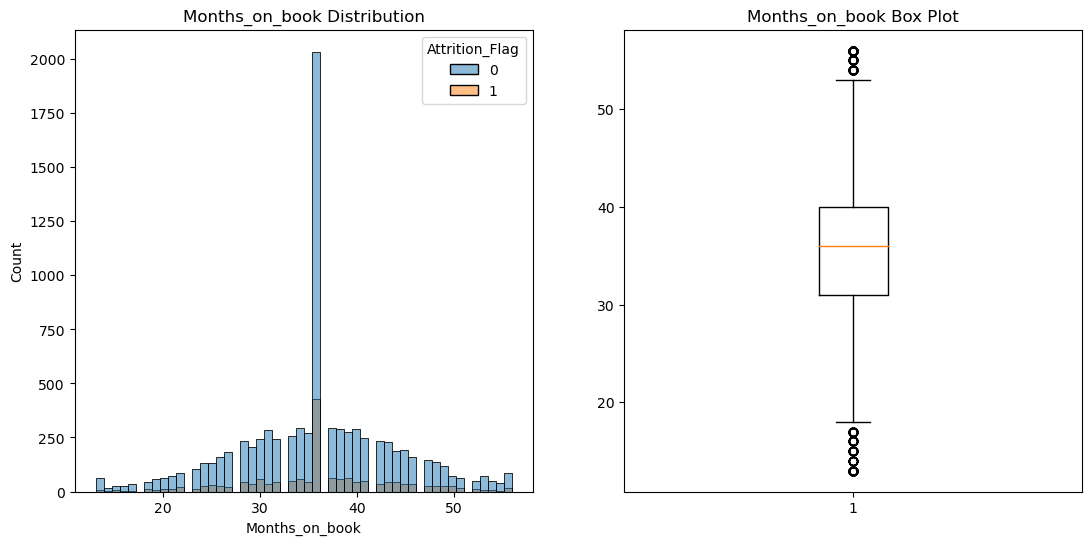

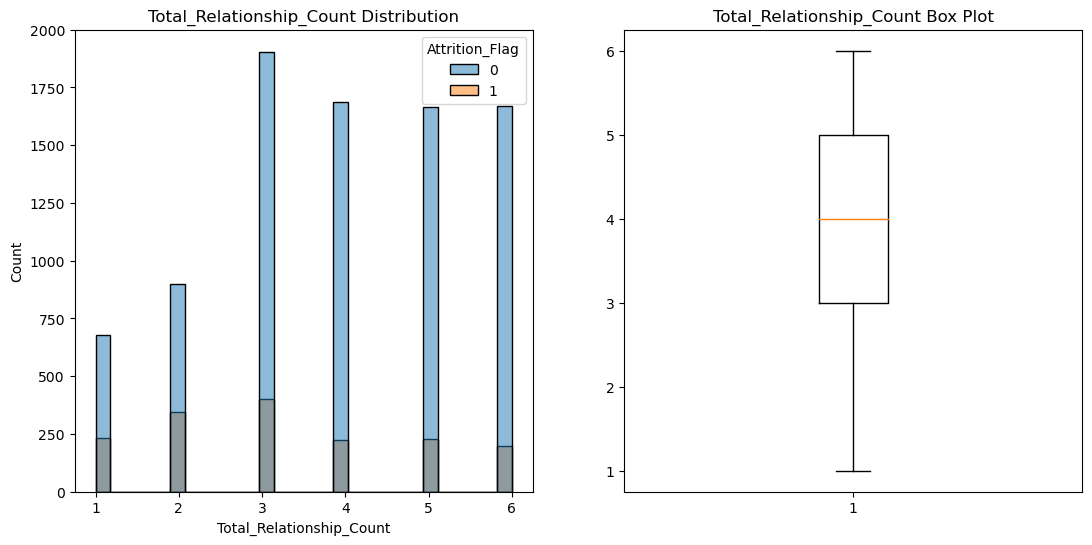

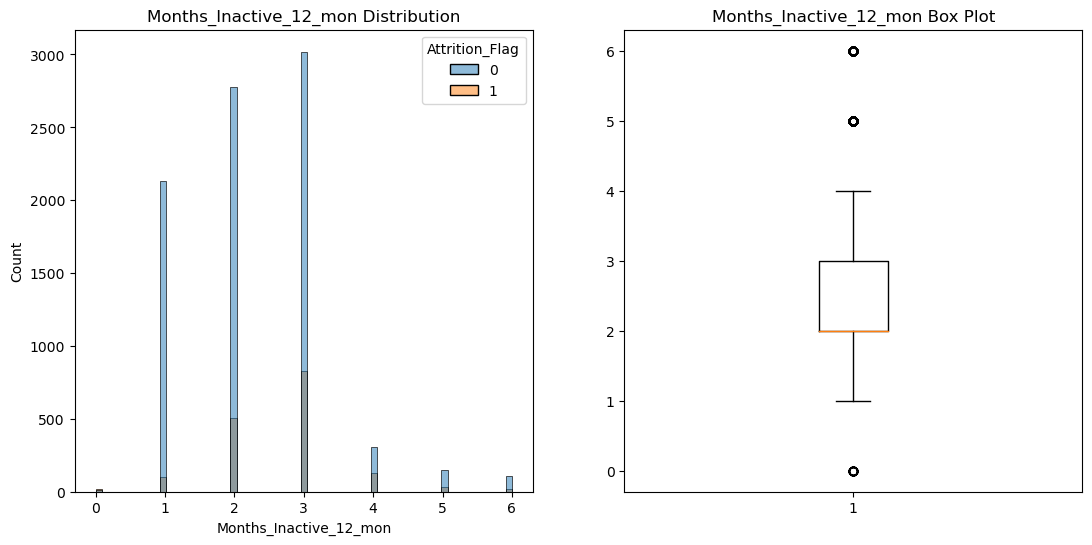

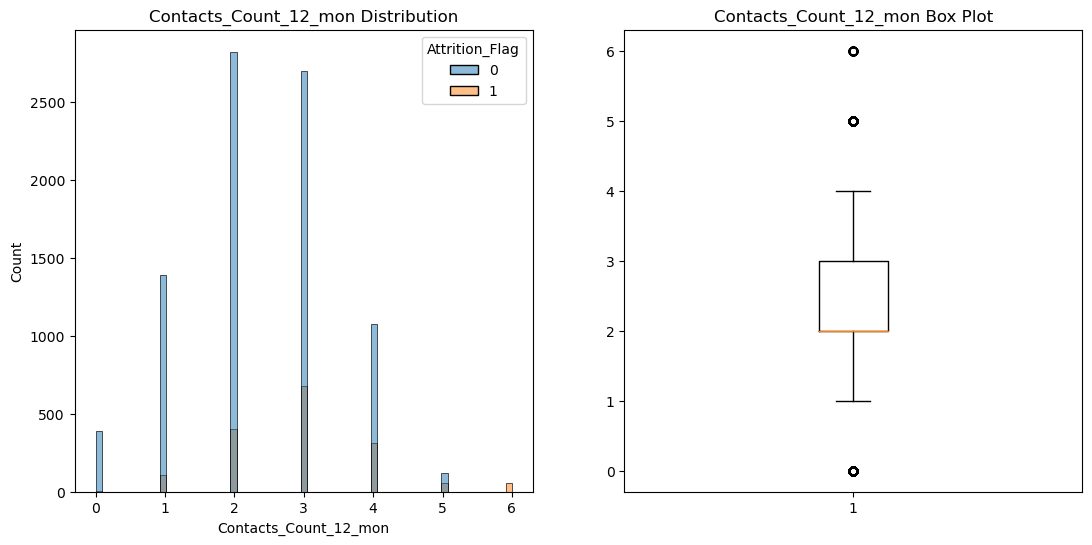

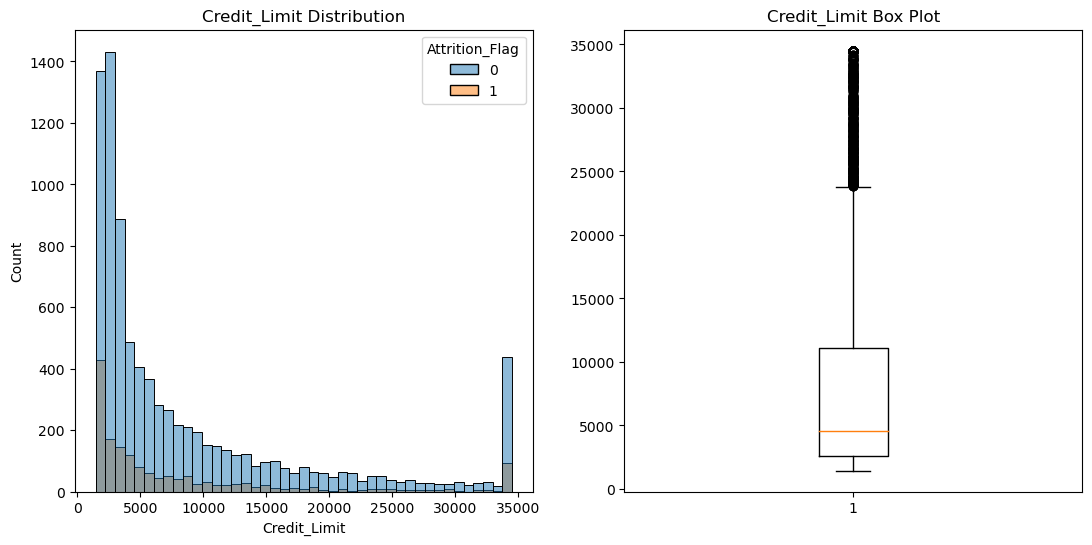

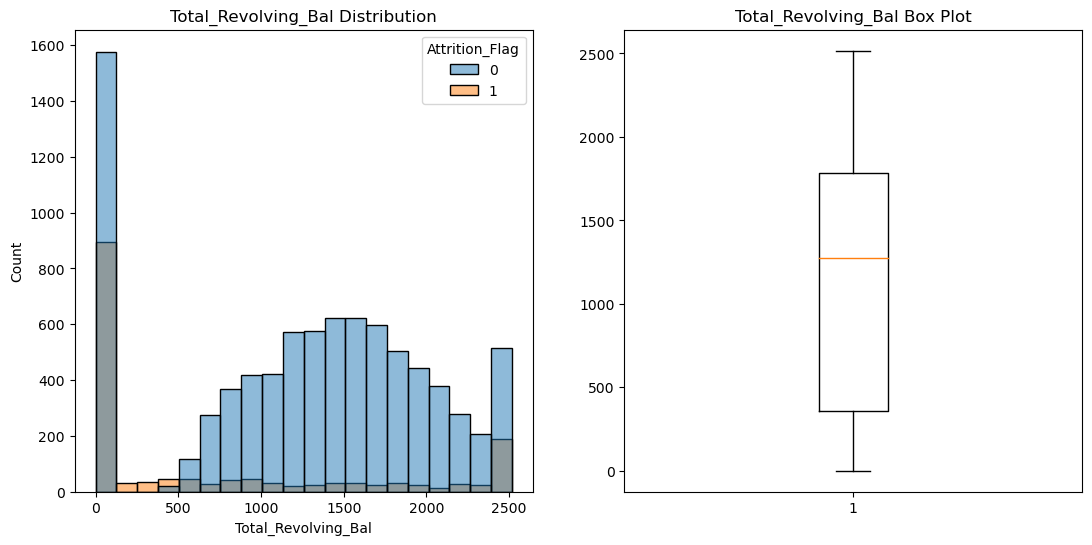

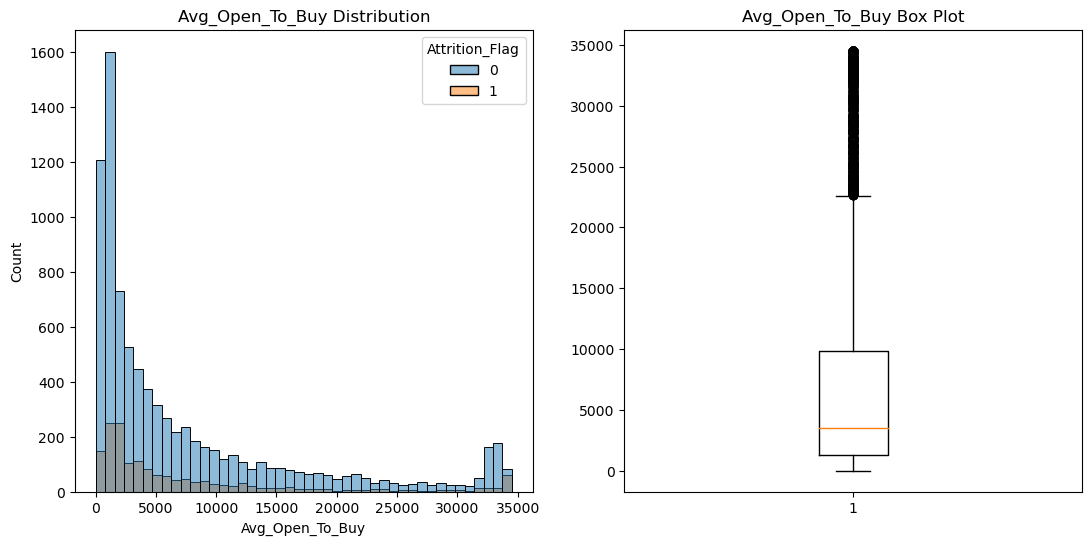

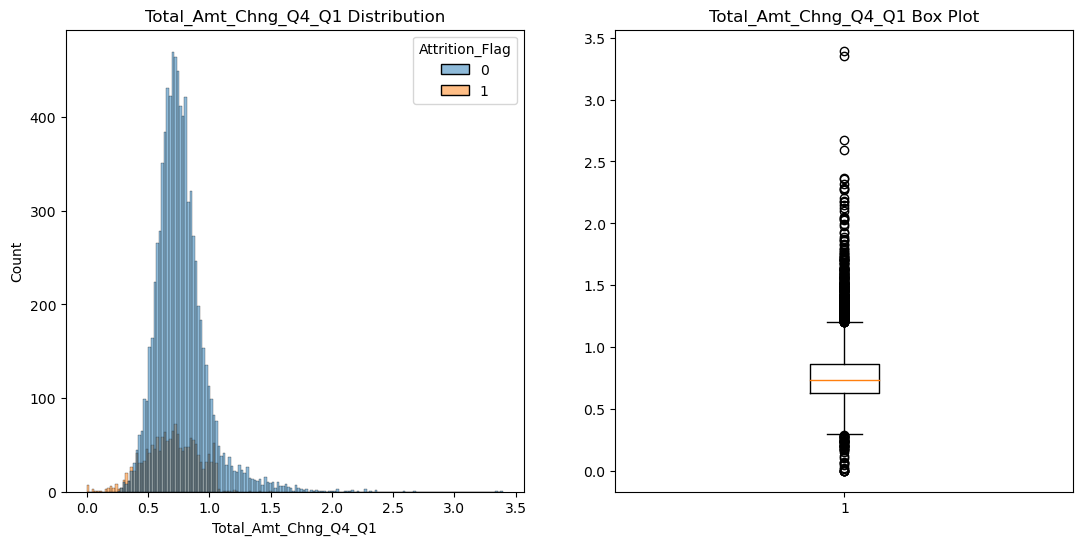

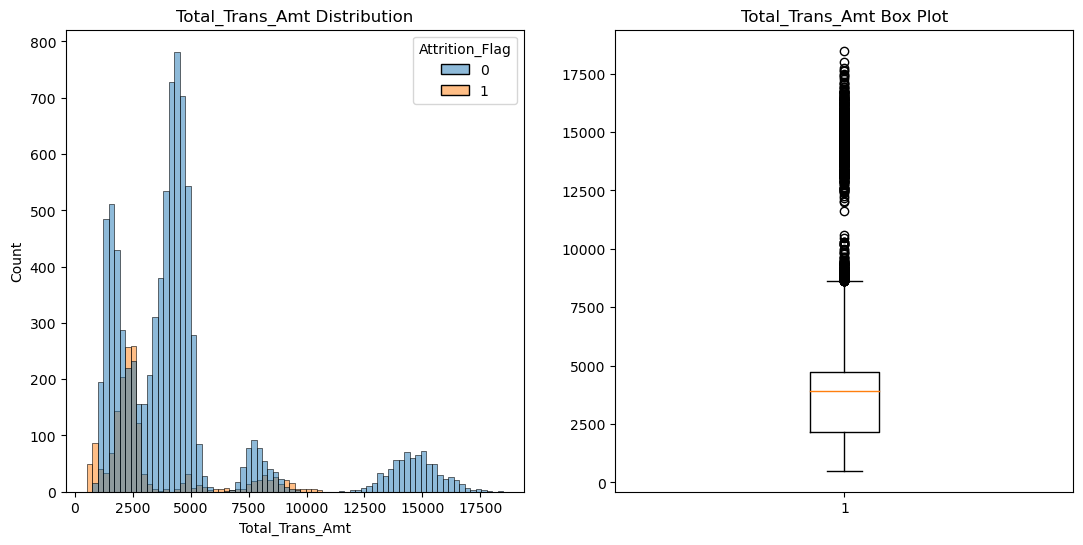

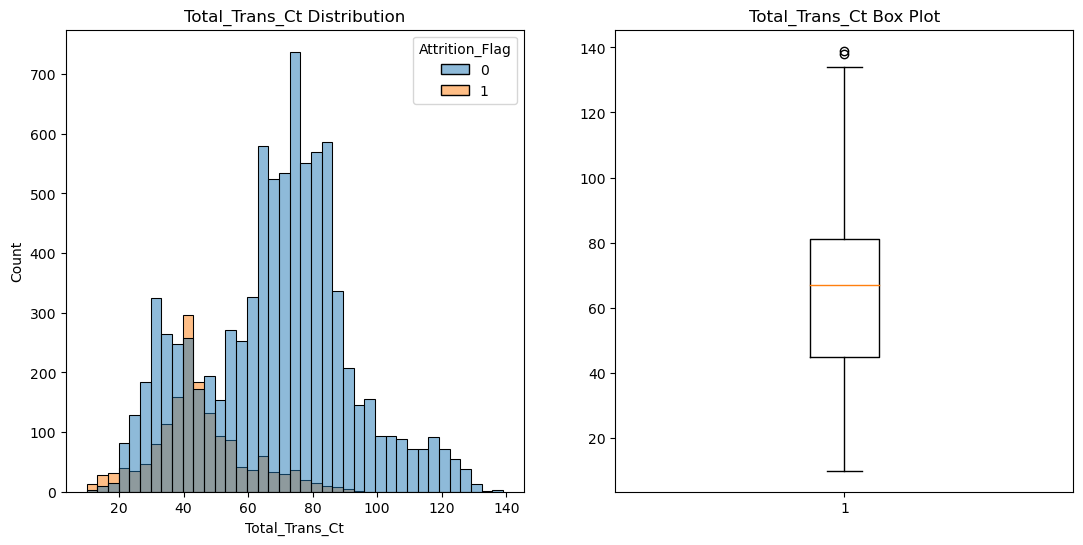

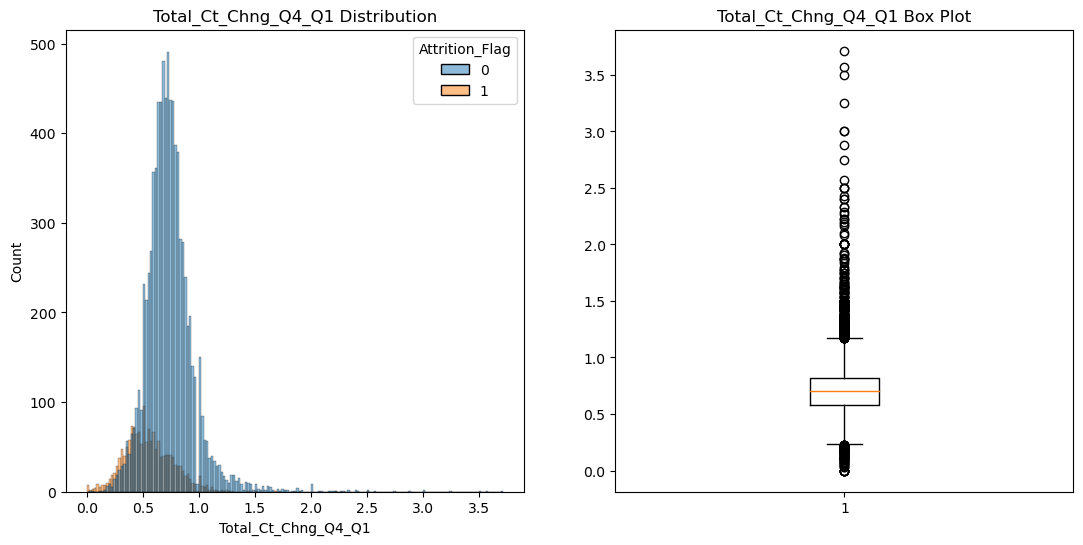

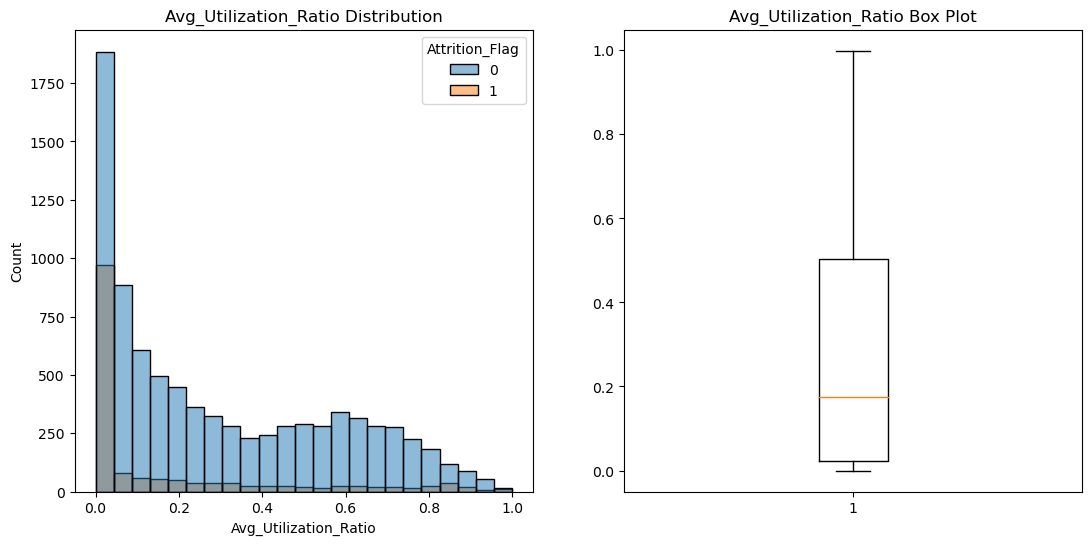

In [18]:
num_feature=[feature for feature in bank.columns
    if bank[feature].dtype!=object]
for feature in num_feature:
    if feature=='Attrition_Flag':
        continue
    else:
        plt.figure(figsize = (13,6))
        #Histogram
        plt.subplot(1,2,1)
        sns.histplot(x=bank[feature], hue= bank['Attrition_Flag'])
        plt.title(feature+' '+'Distribution')

        #Box Plot
        plt.subplot(1,2,2)
        plt.boxplot(bank[feature])
        plt.title(feature+' '+'Box Plot')
        plt.show()

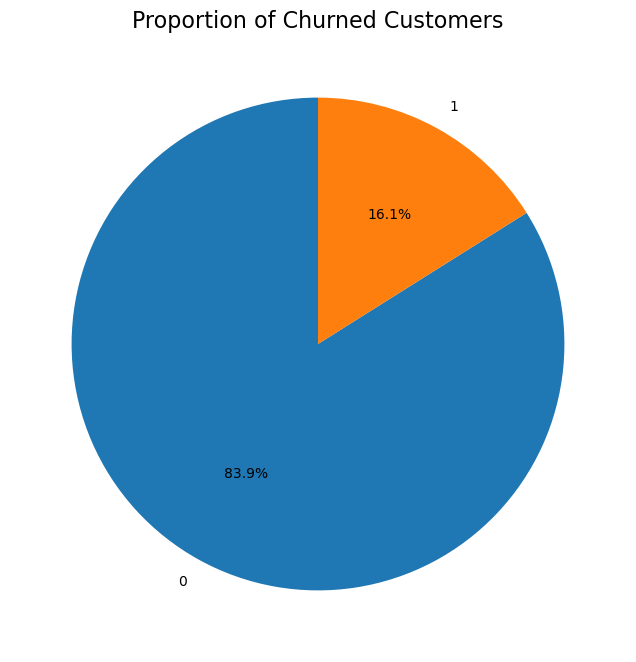

In [19]:
#Proportion of Attrited Customers
plt.figure(figsize = (8,8))
plt.pie(bank['Attrition_Flag'].value_counts(), labels =bank['Attrition_Flag'].value_counts().index, autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Churned Customers', fontsize = 16)
plt.show()

It can be observed that the dataset is severly imbalanced with respect to the target variable.

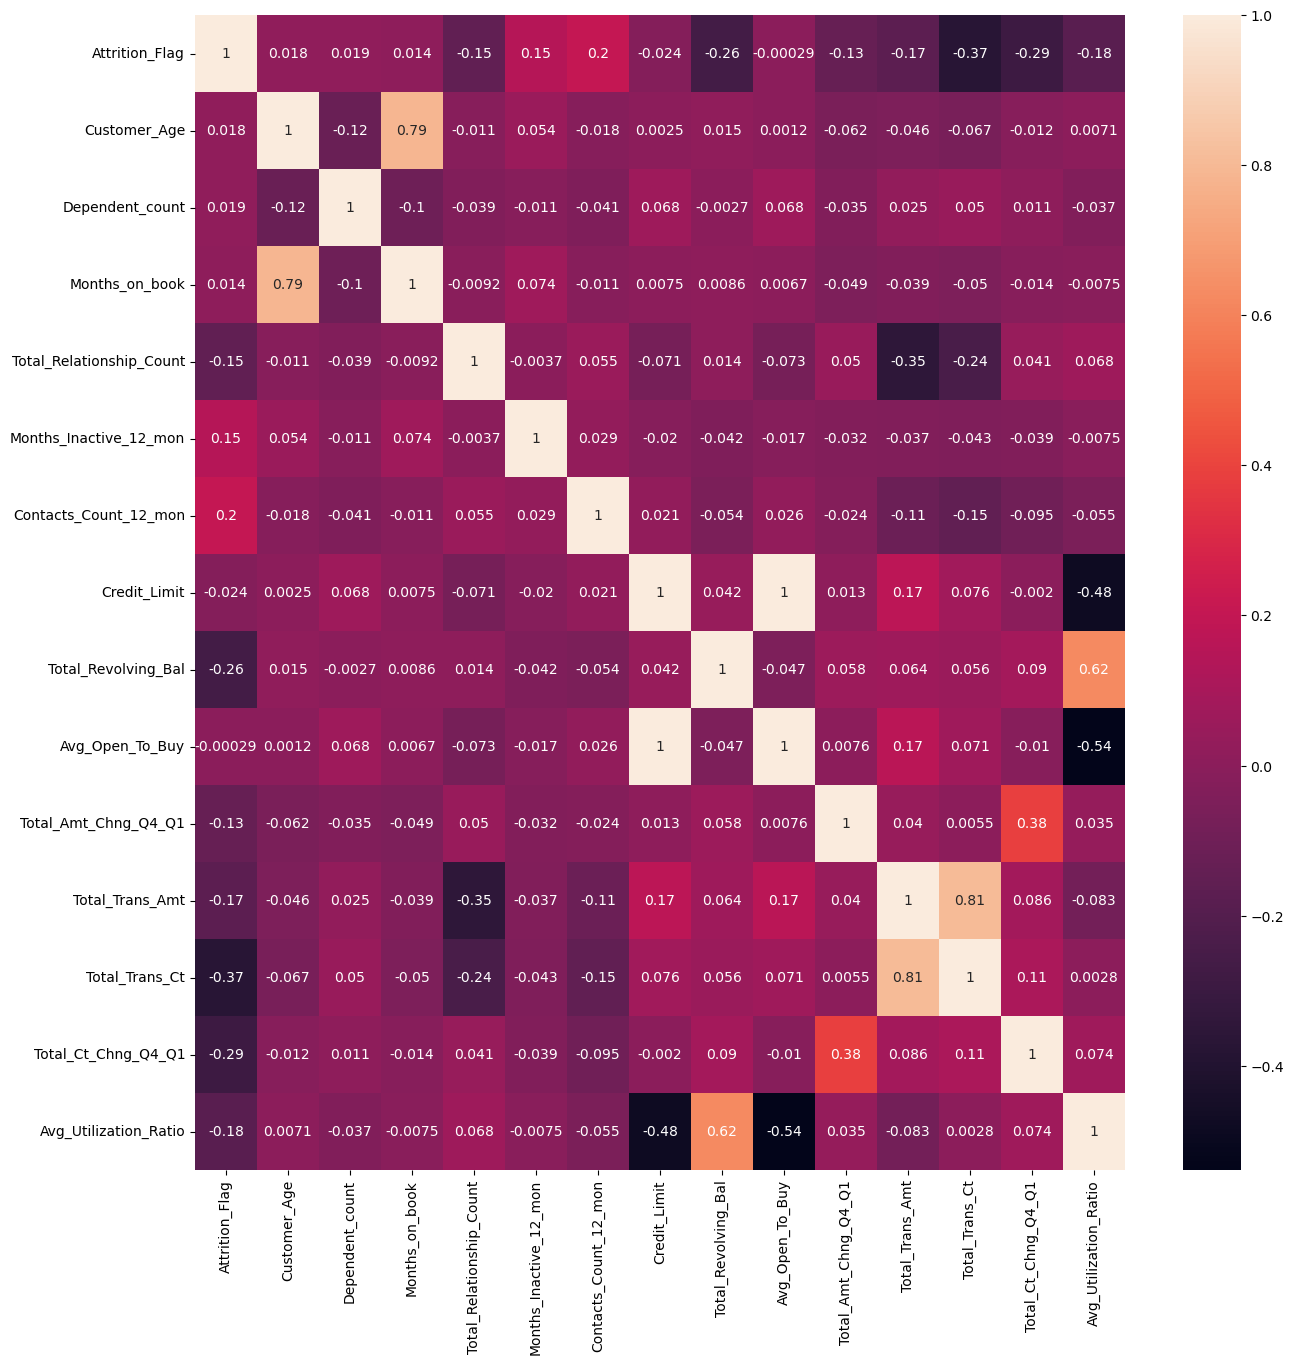

In [20]:
#Correlation between the numerical features
corrmat = bank.corr()
plt.figure(figsize=(15,15))
g=sns.heatmap(corrmat,annot=True)

We see that the categorical features have very low correlation to churning

In [22]:
#One Hot Encoding
bank_enc=pd.get_dummies(bank, columns=cat_feature,drop_first=False)

In [23]:
#Dropping the "Attrition_Flag" column
y = bank_enc.pop("Attrition_Flag")

#Splitting the data into test and train sets
X = bank_enc
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [24]:
# Normalizing the data
num_feature.remove("Attrition_Flag")
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[num_feature])
X_test = scaler.transform(X_test[num_feature])

In [25]:
# Applying SMOTE to handle imbalance in target variable

sm = SMOTE(random_state=50)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [26]:
# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=70, use_label_encoder=False, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb=xgb_model.predict(X_test)

#Random Forest
rfmodel = RandomForestClassifier(n_estimators=80, random_state=50)
rfmodel.fit(X_train, y_train)
y_pred_rf = rfmodel.predict(X_test)

#GradientBoosting Model
grad_boost = GradientBoostingClassifier(n_estimators=80, learning_rate=1)
grad_boost.fit(X_train, y_train)
y_pred_grad=grad_boost.predict(X_test)

In [27]:
#Model Scores
xgbscore=xgb_model.score(X_test, y_test)
rfscore=rfmodel.score(X_test, y_test)
gradscore=grad_boost.score(X_test, y_test)

scores= '''XGBoost Model Score= {}
Random Forest Model Score= {}
GradientBoosting Model Score = {}'''

print(scores.format(xgbscore,rfscore,gradscore))

XGBoost Model Score= 0.9733464955577492
Random Forest Model Score= 0.9669299111549852
GradientBoosting Model Score = 0.9693978282329714


# Evaluation of Models
The performance of each model will be evaluated using confusion matirx, ROC Curve and the Classification Report.

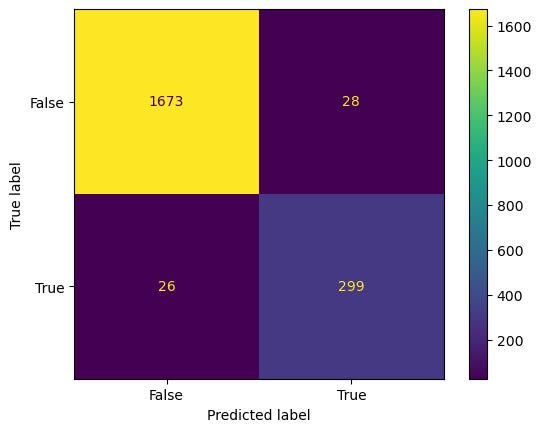

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.91      0.92      0.92       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [28]:
#XGBoost Confusion Matrix and classification report

cm = metrics.confusion_matrix(y_test, y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

print(metrics.classification_report(y_test,y_pred_xgb))

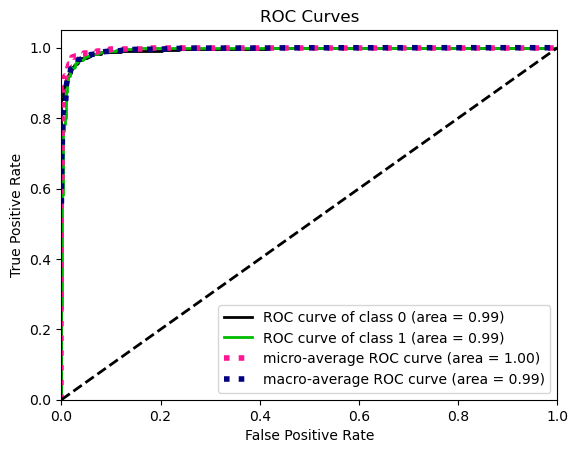

In [29]:
#XGBoost ROC Curve
y_probas = xgb_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

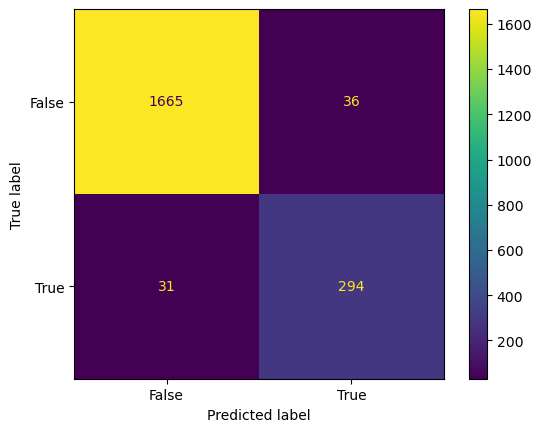

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.89      0.90      0.90       325

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [30]:
#Random Forest Confusion Matrix and classification report

rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = [False, True])
cm_display.plot()
plt.show()

print(metrics.classification_report(y_test,y_pred_rf))

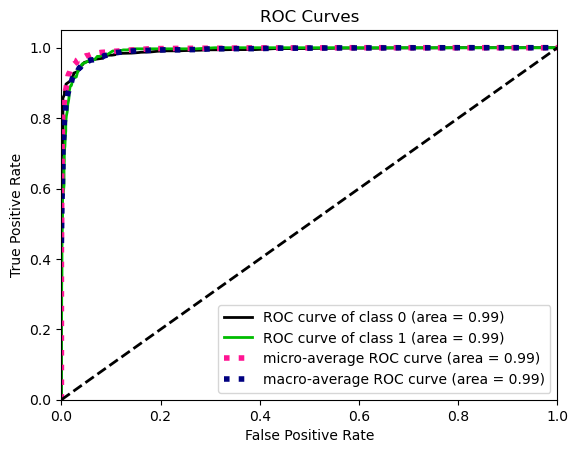

In [31]:
#Random Forest ROC Curve
rf_y_probas = rfmodel.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, rf_y_probas)
plt.show()

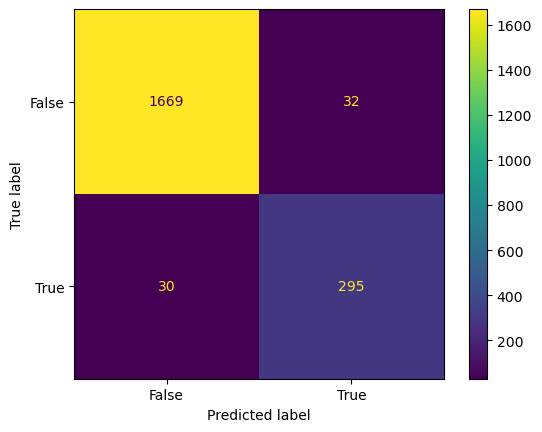

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.90      0.91      0.90       325

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [32]:
#GradientBoosting Confusion Matrix and classification report

grad_cm = metrics.confusion_matrix(y_test, y_pred_grad)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = grad_cm, display_labels = [False, True])
cm_display.plot()
plt.show()

print(metrics.classification_report(y_test,y_pred_grad))

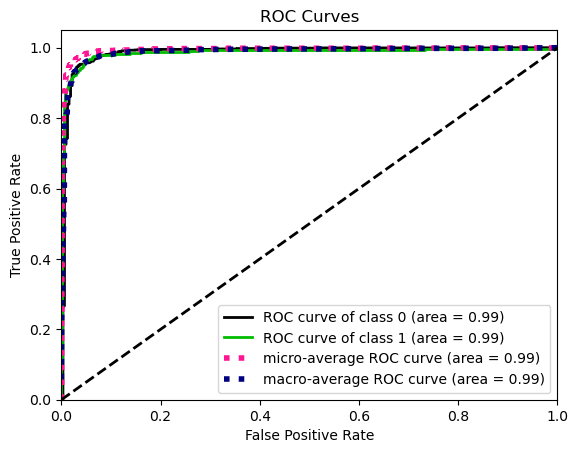

In [33]:
#GradientBoosting ROC Curve
grad_y_probas = grad_boost.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, grad_y_probas)
plt.show()

We see that XGBoost has the highest accuracy and the best precision and recall difference among the three. Thus, it is the most efficient model.
Now, we shall see the features that XGBoost has considered important.

<AxesSubplot:>

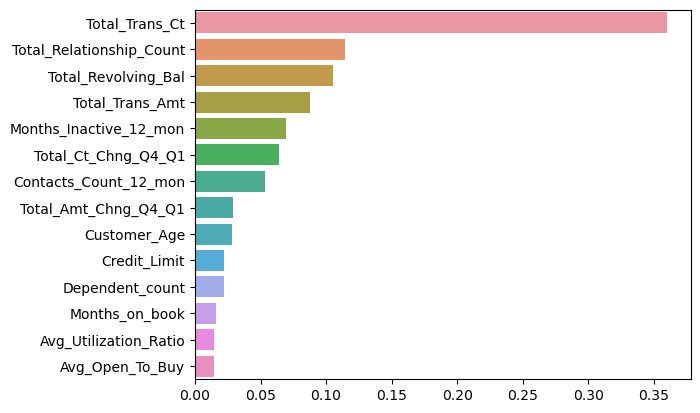

In [34]:
#Important Features
feature_imp = pd.Series(xgb_model.feature_importances_, index = num_feature).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)